## Logic Based FizzBuzz Function [Software 1.0]

In [27]:
import pandas as pd

def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:
        return 'FizzBuzz'
    elif n % 3 == 0:
        return 'Fizz'
    elif n % 5 == 0:
        return 'Buzz'
    else:
        return 'Other'

## Create Training and Testing Datasets in CSV Format

In [28]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    # List provides easy access, and fexibility to change the value using index and primarily duplicates are allowed.
    # Using Set or Tuples won't suffice the purpose here.
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    # Training data is the vital part of any Machine Learning Problem.
    # A ML model is trained using the training data as the input and comparing the expected output with the obtained output.
    for i in range(start,end):
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    # DataFrame is a data structure in Pandas.
    # DataFrame is a two dimentional where the columns are labeled in it like a SQL DB. 
    # Thats why we use DataFrame to write Training and Testing input files.
    # In this program we are feeding python dictionary to create the Data Frames which will label
    # the training and testing input files as "input" and "Label" 
    dataset = {}
    dataset["input"]  = inputData
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename)
    
    print(filename, "Created!")

## Processing Input and Label Data

In [29]:
def processData(dataset):
    
    # Why do we have to process?
    # Every model requires a specific type of input, in order to provide a understandable input to the model
    # we need to process the data.
    # We can not give the input number directly to the node/model, thus we are analyzing each bit of the 
    # individual numbers by processing it.
    # encodeData function converts the input to its binary form
    # encodeLabel gives an integer value to each lable
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data)
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [30]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
        # Why do we have number 10?
        # We have 900 numbers in the training set, if we have to represent those big numbers we need 10 bits in the binary form
        # 2^10 = 1024. So 10 bits is enough to represent till 1024 numbers.
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [31]:
from keras.utils import np_utils

def encodeLabel(labels):
    
    processedLabel = []
    
    for labelInstance in labels:
        if(labelInstance == "FizzBuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "Fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "Buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)

## Model Definition

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard

import numpy as np

input_size = 10
drop_out = 0.2
first_dense_layer_nodes  = 256
second_dense_layer_nodes = 4

def get_model():
    
    # Why do we need a model?
    # We need model to implement a ML algorithm. 
    # Why use Dense layer and then activation?
    # Dense layer is used because it connects all the inputs to all the outputs.
    # A weighted sum is computed with each of the connection that is pointing to a neuron which may be any big value.
    # We use activation funtion on the dense layer to bring that weighted sum to bring down to a reasonable range.
    # Why use sequential model with layers?
    # In this Model we are not re-using any layers, thus we are going with the sequential model in keras.
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    
    # Why dropout?
    # Dropout is a regularization technique which helps to avoid overfitting by randomly dropping few nodes.
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    # Why Softmax?
    # It gives the probabilities of different classes when the output is passed through this.
    # Since, we are using 4 output for classification, Softmax gives the probabilities of each.
    model.summary()
    
    # Why use categorical_crossentropy?
    # It is a loss funtion that is ideal for classification type problems with more than two classes. 
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [33]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [34]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               2816      
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 1028      
_________________________________________________________________
activation_6 (Activation)    (None, 4)                 0         
Total params: 3,844
Trainable params: 3,844
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [35]:
validation_data_split = 0.2
num_epochs = 10000
model_batch_size = 128
tb_batch_size = 32
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )


Train on 720 samples, validate on 180 samples
Epoch 1/10000
720/720 [==============================] - 0s 213us/step - loss: 1.2713 - acc: 0.4333 - val_loss: 1.1709 - val_acc: 0.5333
Epoch 2/10000
720/720 [==============================] - 0s 24us/step - loss: 1.1785 - acc: 0.5292 - val_loss: 1.1545 - val_acc: 0.5333
Epoch 3/10000
720/720 [==============================] - 0s 20us/step - loss: 1.1614 - acc: 0.5306 - val_loss: 1.1512 - val_acc: 0.5333
Epoch 4/10000
720/720 [==============================] - 0s 20us/step - loss: 1.1530 - acc: 0.5333 - val_loss: 1.1482 - val_acc: 0.5333
Epoch 5/10000
720/720 [==============================] - 0s 20us/step - loss: 1.1539 - acc: 0.5347 - val_loss: 1.1474 - val_acc: 0.5333
Epoch 6/10000
720/720 [==============================] - 0s 19us/step - loss: 1.1539 - acc: 0.5333 - val_loss: 1.1476 - val_acc: 0.5333
Epoch 7/10000
720/720 [==============================] - 0s 20us/step - loss: 1.1519 - acc: 0.5333 - val_loss: 1.1515 - val_acc: 0.5333
E

720/720 [==============================] - 0s 22us/step - loss: 1.0597 - acc: 0.5389 - val_loss: 1.1316 - val_acc: 0.5333
Epoch 60/10000
720/720 [==============================] - 0s 22us/step - loss: 1.0584 - acc: 0.5389 - val_loss: 1.1291 - val_acc: 0.5333
Epoch 61/10000
720/720 [==============================] - 0s 21us/step - loss: 1.0536 - acc: 0.5389 - val_loss: 1.1309 - val_acc: 0.5333
Epoch 62/10000
720/720 [==============================] - 0s 22us/step - loss: 1.0540 - acc: 0.5333 - val_loss: 1.1287 - val_acc: 0.5333
Epoch 63/10000
720/720 [==============================] - 0s 23us/step - loss: 1.0517 - acc: 0.5361 - val_loss: 1.1278 - val_acc: 0.5333
Epoch 64/10000
720/720 [==============================] - 0s 22us/step - loss: 1.0515 - acc: 0.5389 - val_loss: 1.1269 - val_acc: 0.5333
Epoch 65/10000
720/720 [==============================] - 0s 21us/step - loss: 1.0475 - acc: 0.5389 - val_loss: 1.1277 - val_acc: 0.5333
Epoch 66/10000
720/720 [==============================] 

720/720 [==============================] - 0s 29us/step - loss: 0.9289 - acc: 0.5778 - val_loss: 1.0660 - val_acc: 0.5444
Epoch 119/10000
720/720 [==============================] - 0s 29us/step - loss: 0.9249 - acc: 0.5889 - val_loss: 1.0687 - val_acc: 0.5389
Epoch 120/10000
720/720 [==============================] - 0s 27us/step - loss: 0.9190 - acc: 0.5986 - val_loss: 1.0618 - val_acc: 0.5500
Epoch 121/10000
720/720 [==============================] - 0s 31us/step - loss: 0.9116 - acc: 0.5931 - val_loss: 1.0631 - val_acc: 0.5500
Epoch 122/10000
720/720 [==============================] - 0s 35us/step - loss: 0.9228 - acc: 0.5708 - val_loss: 1.0605 - val_acc: 0.5500
Epoch 123/10000
720/720 [==============================] - 0s 34us/step - loss: 0.9183 - acc: 0.5889 - val_loss: 1.0576 - val_acc: 0.5500
Epoch 124/10000
720/720 [==============================] - 0s 30us/step - loss: 0.9072 - acc: 0.5722 - val_loss: 1.0578 - val_acc: 0.5500
Epoch 125/10000
720/720 [=========================

720/720 [==============================] - 0s 24us/step - loss: 0.7926 - acc: 0.6694 - val_loss: 1.0043 - val_acc: 0.5889
Epoch 178/10000
720/720 [==============================] - 0s 26us/step - loss: 0.7830 - acc: 0.6889 - val_loss: 1.0044 - val_acc: 0.5944
Epoch 179/10000
720/720 [==============================] - 0s 25us/step - loss: 0.7989 - acc: 0.6583 - val_loss: 1.0032 - val_acc: 0.6056
Epoch 180/10000
720/720 [==============================] - 0s 24us/step - loss: 0.7822 - acc: 0.6875 - val_loss: 0.9997 - val_acc: 0.5778
Epoch 181/10000
720/720 [==============================] - 0s 24us/step - loss: 0.7932 - acc: 0.6778 - val_loss: 0.9964 - val_acc: 0.6000
Epoch 182/10000
720/720 [==============================] - 0s 24us/step - loss: 0.7920 - acc: 0.6625 - val_loss: 0.9980 - val_acc: 0.5889
Epoch 183/10000
720/720 [==============================] - 0s 27us/step - loss: 0.7715 - acc: 0.6861 - val_loss: 0.9931 - val_acc: 0.6000
Epoch 184/10000
720/720 [=========================

720/720 [==============================] - 0s 31us/step - loss: 0.6809 - acc: 0.7236 - val_loss: 0.9476 - val_acc: 0.6500
Epoch 237/10000
720/720 [==============================] - 0s 27us/step - loss: 0.6843 - acc: 0.7444 - val_loss: 0.9426 - val_acc: 0.6556
Epoch 238/10000
720/720 [==============================] - 0s 27us/step - loss: 0.6920 - acc: 0.7361 - val_loss: 0.9453 - val_acc: 0.6500
Epoch 239/10000
720/720 [==============================] - 0s 35us/step - loss: 0.6985 - acc: 0.7319 - val_loss: 0.9472 - val_acc: 0.6556
Epoch 240/10000
720/720 [==============================] - 0s 24us/step - loss: 0.7073 - acc: 0.7139 - val_loss: 0.9402 - val_acc: 0.6667
Epoch 241/10000
720/720 [==============================] - 0s 24us/step - loss: 0.6874 - acc: 0.7431 - val_loss: 0.9410 - val_acc: 0.6500
Epoch 242/10000
720/720 [==============================] - 0s 29us/step - loss: 0.6658 - acc: 0.7556 - val_loss: 0.9406 - val_acc: 0.6500
Epoch 243/10000
720/720 [=========================

720/720 [==============================] - 0s 28us/step - loss: 0.6154 - acc: 0.7778 - val_loss: 0.8972 - val_acc: 0.7278
Epoch 296/10000
720/720 [==============================] - 0s 30us/step - loss: 0.6099 - acc: 0.7861 - val_loss: 0.8931 - val_acc: 0.7167
Epoch 297/10000
720/720 [==============================] - 0s 29us/step - loss: 0.6199 - acc: 0.7694 - val_loss: 0.8924 - val_acc: 0.7000
Epoch 298/10000
720/720 [==============================] - 0s 36us/step - loss: 0.6131 - acc: 0.7903 - val_loss: 0.8940 - val_acc: 0.7167
Epoch 299/10000
720/720 [==============================] - 0s 31us/step - loss: 0.6301 - acc: 0.7736 - val_loss: 0.8985 - val_acc: 0.6889
Epoch 300/10000
720/720 [==============================] - 0s 40us/step - loss: 0.6117 - acc: 0.7681 - val_loss: 0.8915 - val_acc: 0.7111
Epoch 301/10000
720/720 [==============================] - 0s 28us/step - loss: 0.5933 - acc: 0.7833 - val_loss: 0.8891 - val_acc: 0.7278
Epoch 302/10000
720/720 [=========================

720/720 [==============================] - 0s 22us/step - loss: 0.5461 - acc: 0.8167 - val_loss: 0.8522 - val_acc: 0.7389
Epoch 355/10000
720/720 [==============================] - 0s 21us/step - loss: 0.5497 - acc: 0.8069 - val_loss: 0.8540 - val_acc: 0.7111
Epoch 356/10000
720/720 [==============================] - 0s 28us/step - loss: 0.5506 - acc: 0.7972 - val_loss: 0.8526 - val_acc: 0.7056
Epoch 357/10000
720/720 [==============================] - 0s 23us/step - loss: 0.5604 - acc: 0.8000 - val_loss: 0.8545 - val_acc: 0.7056
Epoch 358/10000
720/720 [==============================] - 0s 21us/step - loss: 0.5606 - acc: 0.8139 - val_loss: 0.8484 - val_acc: 0.7278
Epoch 359/10000
720/720 [==============================] - 0s 22us/step - loss: 0.5718 - acc: 0.8028 - val_loss: 0.8572 - val_acc: 0.7167
Epoch 360/10000
720/720 [==============================] - 0s 27us/step - loss: 0.5633 - acc: 0.8000 - val_loss: 0.8509 - val_acc: 0.7389
Epoch 361/10000
720/720 [=========================

720/720 [==============================] - 0s 21us/step - loss: 0.5020 - acc: 0.8403 - val_loss: 0.8317 - val_acc: 0.7111
Epoch 414/10000
720/720 [==============================] - 0s 21us/step - loss: 0.4933 - acc: 0.8431 - val_loss: 0.8175 - val_acc: 0.7889
Epoch 415/10000
720/720 [==============================] - 0s 22us/step - loss: 0.4812 - acc: 0.8472 - val_loss: 0.8189 - val_acc: 0.7778
Epoch 416/10000
720/720 [==============================] - 0s 22us/step - loss: 0.5144 - acc: 0.8236 - val_loss: 0.8215 - val_acc: 0.7667
Epoch 417/10000
720/720 [==============================] - 0s 21us/step - loss: 0.5281 - acc: 0.8333 - val_loss: 0.8182 - val_acc: 0.7611
Epoch 418/10000
720/720 [==============================] - 0s 21us/step - loss: 0.5019 - acc: 0.8347 - val_loss: 0.8130 - val_acc: 0.7833
Epoch 419/10000
720/720 [==============================] - 0s 34us/step - loss: 0.4724 - acc: 0.8389 - val_loss: 0.8160 - val_acc: 0.7556
Epoch 420/10000
720/720 [=========================

720/720 [==============================] - 0s 22us/step - loss: 0.4674 - acc: 0.8347 - val_loss: 0.8020 - val_acc: 0.7444
Epoch 473/10000
720/720 [==============================] - 0s 29us/step - loss: 0.4530 - acc: 0.8278 - val_loss: 0.7888 - val_acc: 0.7944
Epoch 474/10000
720/720 [==============================] - 0s 22us/step - loss: 0.4662 - acc: 0.8403 - val_loss: 0.8039 - val_acc: 0.7556
Epoch 475/10000
720/720 [==============================] - 0s 22us/step - loss: 0.4556 - acc: 0.8500 - val_loss: 0.8056 - val_acc: 0.7444
Epoch 476/10000
720/720 [==============================] - 0s 22us/step - loss: 0.4660 - acc: 0.8347 - val_loss: 0.8054 - val_acc: 0.7333
Epoch 477/10000
720/720 [==============================] - 0s 21us/step - loss: 0.4766 - acc: 0.8264 - val_loss: 0.7945 - val_acc: 0.7889
Epoch 478/10000
720/720 [==============================] - ETA: 0s - loss: 0.4654 - acc: 0.843 - 0s 21us/step - loss: 0.4528 - acc: 0.8542 - val_loss: 0.8018 - val_acc: 0.7778
Epoch 479/10

720/720 [==============================] - 0s 23us/step - loss: 0.4470 - acc: 0.8458 - val_loss: 0.7964 - val_acc: 0.7389
Epoch 532/10000
720/720 [==============================] - 0s 22us/step - loss: 0.4429 - acc: 0.8486 - val_loss: 0.7906 - val_acc: 0.7667
Epoch 533/10000
720/720 [==============================] - 0s 23us/step - loss: 0.4373 - acc: 0.8444 - val_loss: 0.7728 - val_acc: 0.7944
Epoch 534/10000
720/720 [==============================] - 0s 21us/step - loss: 0.4359 - acc: 0.8444 - val_loss: 0.7744 - val_acc: 0.7722
Epoch 535/10000
720/720 [==============================] - 0s 24us/step - loss: 0.4353 - acc: 0.8514 - val_loss: 0.7656 - val_acc: 0.8111
Epoch 536/10000
720/720 [==============================] - 0s 22us/step - loss: 0.4338 - acc: 0.8514 - val_loss: 0.7887 - val_acc: 0.7333
Epoch 537/10000
720/720 [==============================] - 0s 22us/step - loss: 0.4501 - acc: 0.8486 - val_loss: 0.7806 - val_acc: 0.7722
Epoch 538/10000
720/720 [=========================

720/720 [==============================] - ETA: 0s - loss: 0.3502 - acc: 0.929 - 0s 24us/step - loss: 0.4103 - acc: 0.8514 - val_loss: 0.7635 - val_acc: 0.7778
Epoch 591/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3932 - acc: 0.8597 - val_loss: 0.7596 - val_acc: 0.7833
Epoch 592/10000
720/720 [==============================] - 0s 24us/step - loss: 0.4011 - acc: 0.8694 - val_loss: 0.7650 - val_acc: 0.7611
Epoch 593/10000
720/720 [==============================] - 0s 21us/step - loss: 0.4269 - acc: 0.8431 - val_loss: 0.7611 - val_acc: 0.7833
Epoch 594/10000
720/720 [==============================] - 0s 23us/step - loss: 0.4306 - acc: 0.8528 - val_loss: 0.7504 - val_acc: 0.8056
Epoch 595/10000
720/720 [==============================] - 0s 21us/step - loss: 0.4149 - acc: 0.8667 - val_loss: 0.7570 - val_acc: 0.7833
Epoch 596/10000
720/720 [==============================] - 0s 22us/step - loss: 0.4165 - acc: 0.8486 - val_loss: 0.7860 - val_acc: 0.7444
Epoch 597/10

720/720 [==============================] - 0s 30us/step - loss: 0.3799 - acc: 0.8764 - val_loss: 0.7523 - val_acc: 0.8056
Epoch 649/10000
720/720 [==============================] - 0s 27us/step - loss: 0.4027 - acc: 0.8542 - val_loss: 0.7502 - val_acc: 0.8222
Epoch 650/10000
720/720 [==============================] - 0s 35us/step - loss: 0.4019 - acc: 0.8514 - val_loss: 0.7584 - val_acc: 0.7889
Epoch 651/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3863 - acc: 0.8653 - val_loss: 0.7528 - val_acc: 0.8000
Epoch 652/10000
720/720 [==============================] - 0s 35us/step - loss: 0.3999 - acc: 0.8639 - val_loss: 0.7594 - val_acc: 0.7778
Epoch 653/10000
720/720 [==============================] - 0s 29us/step - loss: 0.3750 - acc: 0.8639 - val_loss: 0.7440 - val_acc: 0.8278
Epoch 654/10000
720/720 [==============================] - 0s 34us/step - loss: 0.4102 - acc: 0.8625 - val_loss: 0.7824 - val_acc: 0.7611
Epoch 655/10000
720/720 [=========================

720/720 [==============================] - 0s 27us/step - loss: 0.3745 - acc: 0.8653 - val_loss: 0.7335 - val_acc: 0.8222
Epoch 708/10000
720/720 [==============================] - 0s 23us/step - loss: 0.3612 - acc: 0.8736 - val_loss: 0.7403 - val_acc: 0.8056
Epoch 709/10000
720/720 [==============================] - 0s 21us/step - loss: 0.3889 - acc: 0.8500 - val_loss: 0.7537 - val_acc: 0.8000
Epoch 710/10000
720/720 [==============================] - 0s 21us/step - loss: 0.4081 - acc: 0.8611 - val_loss: 0.7698 - val_acc: 0.7722
Epoch 711/10000
720/720 [==============================] - 0s 21us/step - loss: 0.3716 - acc: 0.8861 - val_loss: 0.7849 - val_acc: 0.7389
Epoch 712/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3861 - acc: 0.8667 - val_loss: 0.7429 - val_acc: 0.8056
Epoch 713/10000
720/720 [==============================] - 0s 21us/step - loss: 0.3847 - acc: 0.8667 - val_loss: 0.7388 - val_acc: 0.8111
Epoch 714/10000
720/720 [=========================

720/720 [==============================] - 0s 35us/step - loss: 0.3856 - acc: 0.8583 - val_loss: 0.7359 - val_acc: 0.8167
Epoch 767/10000
720/720 [==============================] - 0s 40us/step - loss: 0.3855 - acc: 0.8625 - val_loss: 0.7439 - val_acc: 0.7778
Epoch 768/10000
720/720 [==============================] - 0s 39us/step - loss: 0.3616 - acc: 0.8667 - val_loss: 0.7204 - val_acc: 0.8111
Epoch 769/10000
720/720 [==============================] - 0s 38us/step - loss: 0.3488 - acc: 0.8750 - val_loss: 0.7306 - val_acc: 0.7944
Epoch 770/10000
720/720 [==============================] - 0s 35us/step - loss: 0.3879 - acc: 0.8625 - val_loss: 0.7195 - val_acc: 0.8167
Epoch 771/10000
720/720 [==============================] - 0s 31us/step - loss: 0.3603 - acc: 0.8722 - val_loss: 0.7276 - val_acc: 0.8111
Epoch 772/10000
720/720 [==============================] - 0s 31us/step - loss: 0.3592 - acc: 0.8819 - val_loss: 0.7428 - val_acc: 0.7778
Epoch 773/10000
720/720 [=========================

720/720 [==============================] - 0s 32us/step - loss: 0.3649 - acc: 0.8736 - val_loss: 0.7423 - val_acc: 0.7667
Epoch 826/10000
720/720 [==============================] - 0s 29us/step - loss: 0.3521 - acc: 0.8736 - val_loss: 0.7431 - val_acc: 0.7667
Epoch 827/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3322 - acc: 0.8819 - val_loss: 0.7144 - val_acc: 0.8278
Epoch 828/10000
720/720 [==============================] - 0s 24us/step - loss: 0.3639 - acc: 0.8528 - val_loss: 0.7416 - val_acc: 0.7889
Epoch 829/10000
720/720 [==============================] - 0s 23us/step - loss: 0.3558 - acc: 0.8653 - val_loss: 0.7167 - val_acc: 0.8167
Epoch 830/10000
720/720 [==============================] - 0s 26us/step - loss: 0.3664 - acc: 0.8653 - val_loss: 0.7144 - val_acc: 0.8167
Epoch 831/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3605 - acc: 0.8722 - val_loss: 0.7183 - val_acc: 0.8167
Epoch 832/10000
720/720 [=========================

720/720 [==============================] - 0s 25us/step - loss: 0.3448 - acc: 0.8750 - val_loss: 0.7030 - val_acc: 0.8500
Epoch 885/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3364 - acc: 0.8778 - val_loss: 0.7204 - val_acc: 0.8111
Epoch 886/10000
720/720 [==============================] - 0s 23us/step - loss: 0.3340 - acc: 0.8778 - val_loss: 0.7273 - val_acc: 0.8111
Epoch 887/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3323 - acc: 0.8778 - val_loss: 0.7609 - val_acc: 0.7722
Epoch 888/10000
720/720 [==============================] - 0s 21us/step - loss: 0.3488 - acc: 0.8708 - val_loss: 0.7435 - val_acc: 0.7722
Epoch 889/10000
720/720 [==============================] - 0s 23us/step - loss: 0.3287 - acc: 0.8736 - val_loss: 0.7292 - val_acc: 0.7722
Epoch 890/10000
720/720 [==============================] - 0s 21us/step - loss: 0.3567 - acc: 0.8611 - val_loss: 0.7216 - val_acc: 0.8056
Epoch 891/10000
720/720 [=========================

Epoch 943/10000
720/720 [==============================] - 0s 21us/step - loss: 0.3370 - acc: 0.8736 - val_loss: 0.7243 - val_acc: 0.8111
Epoch 944/10000
720/720 [==============================] - 0s 34us/step - loss: 0.3341 - acc: 0.8694 - val_loss: 0.7070 - val_acc: 0.8389
Epoch 945/10000
720/720 [==============================] - 0s 21us/step - loss: 0.3554 - acc: 0.8722 - val_loss: 0.7361 - val_acc: 0.8056
Epoch 946/10000
720/720 [==============================] - 0s 23us/step - loss: 0.3263 - acc: 0.8861 - val_loss: 0.7300 - val_acc: 0.8222
Epoch 947/10000
720/720 [==============================] - 0s 21us/step - loss: 0.3357 - acc: 0.8778 - val_loss: 0.7186 - val_acc: 0.8278
Epoch 948/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3285 - acc: 0.8778 - val_loss: 0.7024 - val_acc: 0.8500
Epoch 949/10000
720/720 [==============================] - 0s 21us/step - loss: 0.3579 - acc: 0.8611 - val_loss: 0.7187 - val_acc: 0.8278
Epoch 950/10000
720/720 [=========

720/720 [==============================] - 0s 24us/step - loss: 0.3005 - acc: 0.8903 - val_loss: 0.7035 - val_acc: 0.8333
Epoch 1003/10000
720/720 [==============================] - 0s 21us/step - loss: 0.3186 - acc: 0.8917 - val_loss: 0.7133 - val_acc: 0.8222
Epoch 1004/10000
720/720 [==============================] - 0s 21us/step - loss: 0.3497 - acc: 0.8542 - val_loss: 0.7241 - val_acc: 0.7944
Epoch 1005/10000
720/720 [==============================] - 0s 22us/step - loss: 0.3085 - acc: 0.8931 - val_loss: 0.7507 - val_acc: 0.7722
Epoch 1006/10000
720/720 [==============================] - 0s 23us/step - loss: 0.3215 - acc: 0.8736 - val_loss: 0.7064 - val_acc: 0.8444
Epoch 1007/10000
720/720 [==============================] - 0s 23us/step - loss: 0.3511 - acc: 0.8847 - val_loss: 0.7087 - val_acc: 0.8556
Epoch 1008/10000
720/720 [==============================] - ETA: 0s - loss: 0.3005 - acc: 0.890 - 0s 22us/step - loss: 0.3149 - acc: 0.8819 - val_loss: 0.7056 - val_acc: 0.8389
Epoch 

720/720 [==============================] - 0s 24us/step - loss: 0.3410 - acc: 0.8819 - val_loss: 0.7234 - val_acc: 0.8111
Epoch 1060/10000
720/720 [==============================] - 0s 32us/step - loss: 0.3149 - acc: 0.8736 - val_loss: 0.7008 - val_acc: 0.8056
Epoch 1061/10000
720/720 [==============================] - 0s 27us/step - loss: 0.3093 - acc: 0.9014 - val_loss: 0.7048 - val_acc: 0.8056
Epoch 1062/10000
720/720 [==============================] - 0s 32us/step - loss: 0.3542 - acc: 0.8597 - val_loss: 0.7110 - val_acc: 0.8111
Epoch 1063/10000
720/720 [==============================] - 0s 35us/step - loss: 0.3352 - acc: 0.8653 - val_loss: 0.7512 - val_acc: 0.7556
Epoch 1064/10000
720/720 [==============================] - 0s 31us/step - loss: 0.3020 - acc: 0.8903 - val_loss: 0.7000 - val_acc: 0.8389
Epoch 1065/10000
720/720 [==============================] - 0s 30us/step - loss: 0.3079 - acc: 0.8944 - val_loss: 0.6922 - val_acc: 0.8333
Epoch 1066/10000
720/720 [==================

720/720 [==============================] - 0s 25us/step - loss: 0.3192 - acc: 0.8750 - val_loss: 0.7003 - val_acc: 0.8111
Epoch 1119/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3334 - acc: 0.8750 - val_loss: 0.6631 - val_acc: 0.8667
Epoch 1120/10000
720/720 [==============================] - 0s 25us/step - loss: 0.3395 - acc: 0.8625 - val_loss: 0.6978 - val_acc: 0.8111
Epoch 1121/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3298 - acc: 0.8736 - val_loss: 0.6835 - val_acc: 0.8500
Epoch 1122/10000
720/720 [==============================] - 0s 25us/step - loss: 0.3553 - acc: 0.8694 - val_loss: 0.6788 - val_acc: 0.8556
Epoch 1123/10000
720/720 [==============================] - 0s 28us/step - loss: 0.3173 - acc: 0.8903 - val_loss: 0.6939 - val_acc: 0.8333
Epoch 1124/10000
720/720 [==============================] - 0s 31us/step - loss: 0.3454 - acc: 0.8639 - val_loss: 0.7031 - val_acc: 0.8111
Epoch 1125/10000
720/720 [==================

Epoch 1177/10000
720/720 [==============================] - 0s 36us/step - loss: 0.3236 - acc: 0.8819 - val_loss: 0.6817 - val_acc: 0.8500
Epoch 1178/10000
720/720 [==============================] - 0s 32us/step - loss: 0.3184 - acc: 0.8889 - val_loss: 0.6942 - val_acc: 0.8333
Epoch 1179/10000
720/720 [==============================] - 0s 38us/step - loss: 0.2876 - acc: 0.8903 - val_loss: 0.6917 - val_acc: 0.8333
Epoch 1180/10000
720/720 [==============================] - 0s 36us/step - loss: 0.3175 - acc: 0.8875 - val_loss: 0.6911 - val_acc: 0.8333
Epoch 1181/10000
720/720 [==============================] - 0s 37us/step - loss: 0.3407 - acc: 0.8667 - val_loss: 0.6725 - val_acc: 0.8722
Epoch 1182/10000
720/720 [==============================] - 0s 34us/step - loss: 0.3175 - acc: 0.8722 - val_loss: 0.6662 - val_acc: 0.8667
Epoch 1183/10000
720/720 [==============================] - 0s 38us/step - loss: 0.3178 - acc: 0.8958 - val_loss: 0.7015 - val_acc: 0.8167
Epoch 1184/10000
720/720 [=

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d20a340b8>,
      dtype=object)

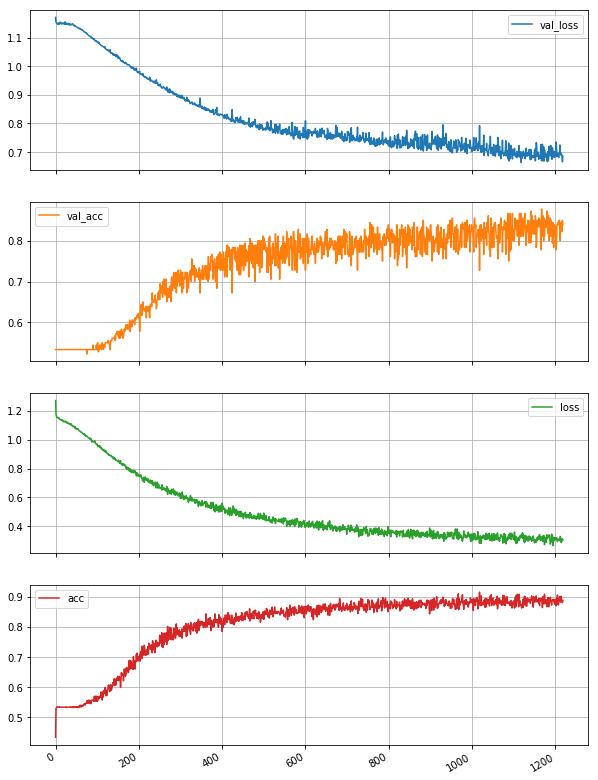

In [36]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [37]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "Other"
    elif encodedLabel == 1:
        return "Fizz"
    elif encodedLabel == 2:
        return "Buzz"
    elif encodedLabel == 3:
        return "FizzBuzz"

In [38]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

# Please input your UBID and personNumber 
testDataInput = testData['input'].tolist()
testDataLabel = testData['label'].tolist()

testDataInput.insert(0, "UBID")
testDataLabel.insert(0, "BASKARAD")

testDataInput.insert(1, "personNumber")
testDataLabel.insert(1, "50291475")

predictedTestLabel.insert(0, "")
predictedTestLabel.insert(1, "")

output = {}
output["input"] = testDataInput
output["label"] = testDataLabel

output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 13  Correct :87
Testing Accuracy: 87.0
